In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('prod.csv')


In [ ]:
sales_data = df.groupby('product_id')['selling_price'].sum().sort_values(ascending=False)


In [ ]:
rating_data = df.groupby('product_id')['product_rating'].mean().sort_values(ascending=False)


In [ ]:
price_data = df.groupby('product_id')['selling_price'].mean().sort_values(ascending=False)


In [ ]:
high_demand = df['category'].value_counts().head(10)


In [ ]:
growth_opportunities = df.groupby('category')['selling_price'].mean().sort_values(ascending=False).head(10)


In [ ]:
brand_loyalty = df.groupby('brand')['customer_reviews_count'].sum().sort_values(ascending=False)


In [ ]:
market_share = df['brand'].value_counts(normalize=True).head(10)


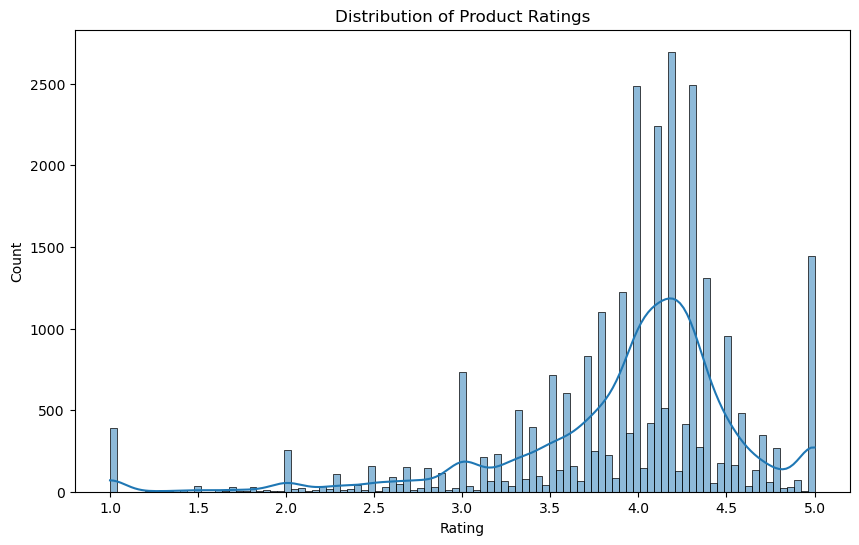

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['product_rating'], kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


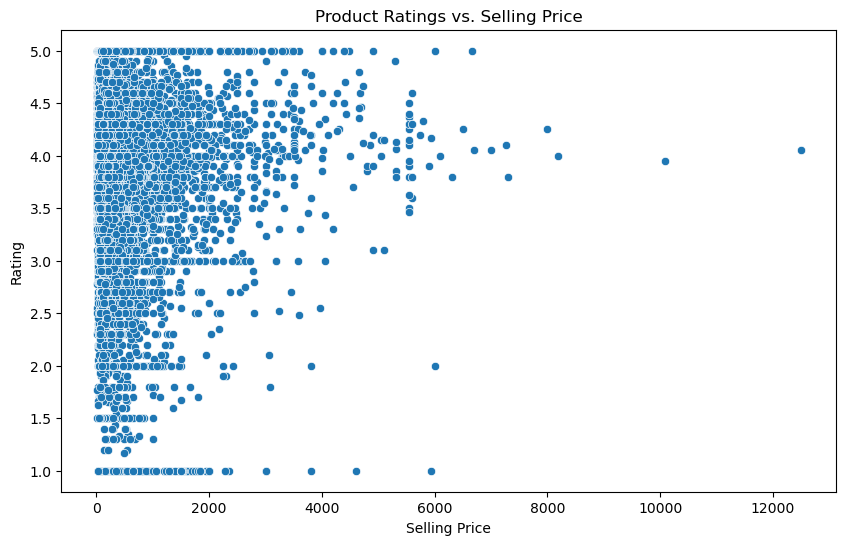

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='selling_price', y='product_rating')
plt.title('Product Ratings vs. Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Rating')
plt.show()


!

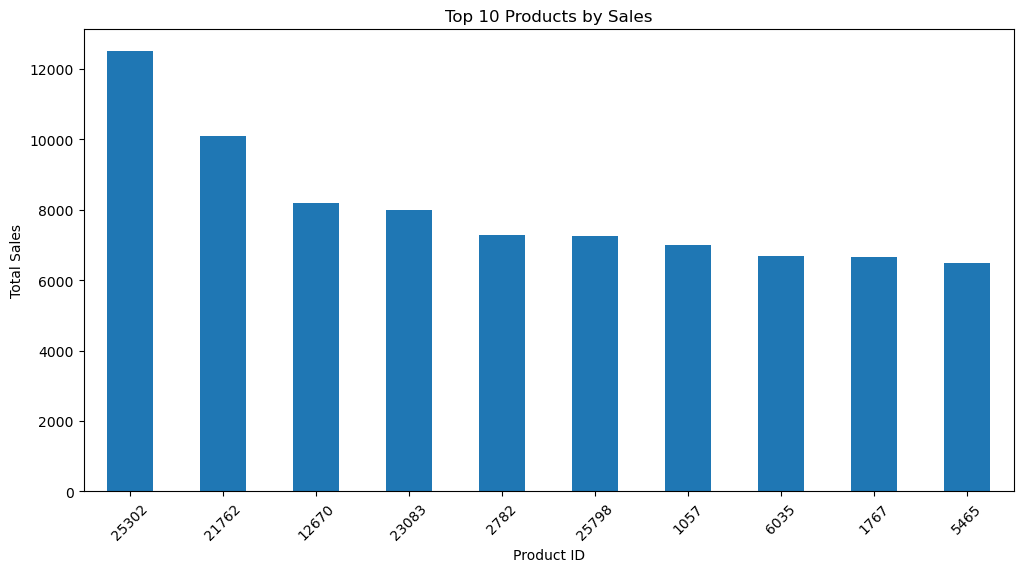

In [ ]:
# Top 10 products by sales
top_sales = sales_data.head(10)

plt.figure(figsize=(12, 6))
top_sales.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


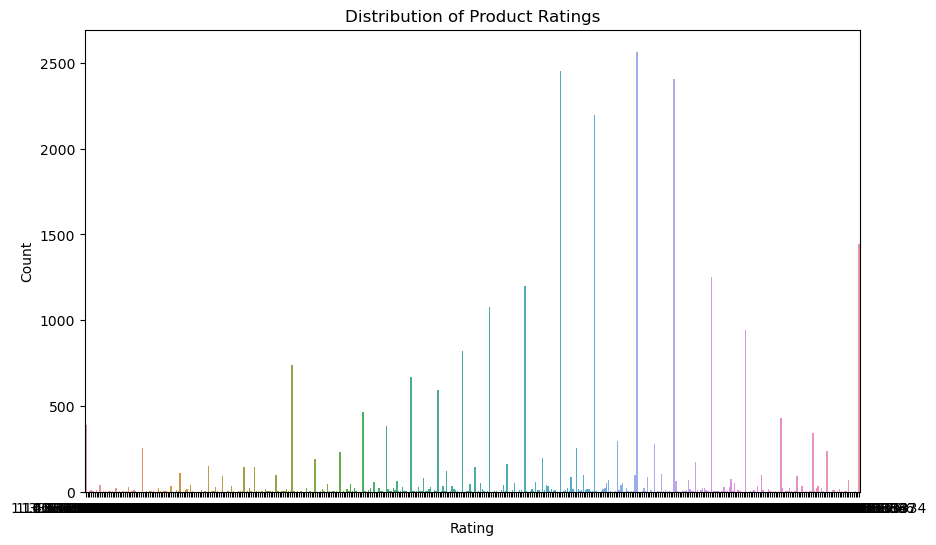

In [ ]:
# Distribution of product ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='product_rating')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


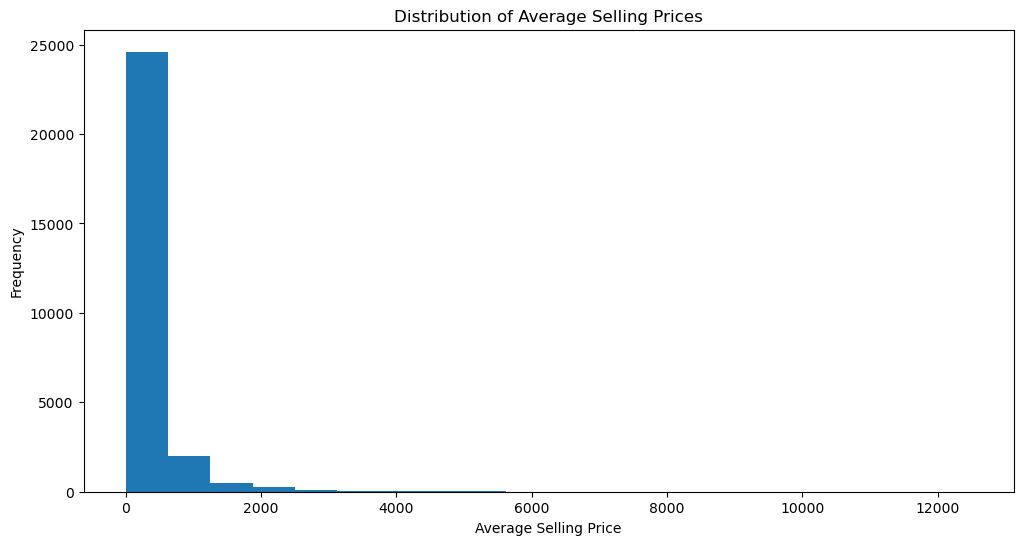

In [ ]:
# Average selling price per product
plt.figure(figsize=(12, 6))
price_data.plot(kind='hist', bins=20)
plt.title('Distribution of Average Selling Prices')
plt.xlabel('Average Selling Price')
plt.ylabel('Frequency')
plt.show()


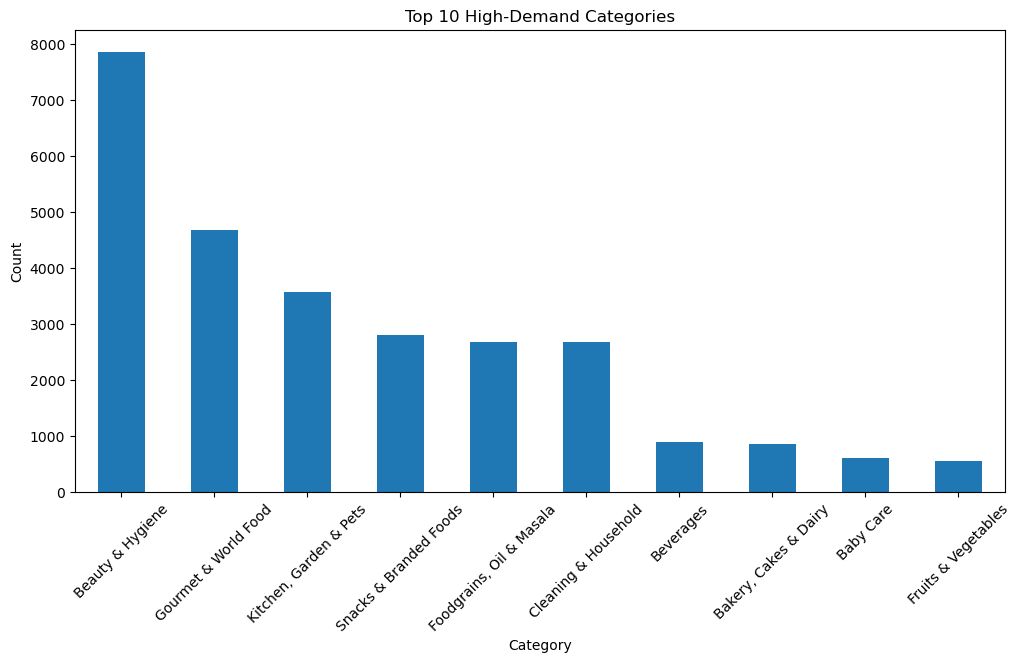

In [ ]:
plt.figure(figsize=(12, 6))
high_demand.plot(kind='bar')
plt.title('Top 10 High-Demand Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


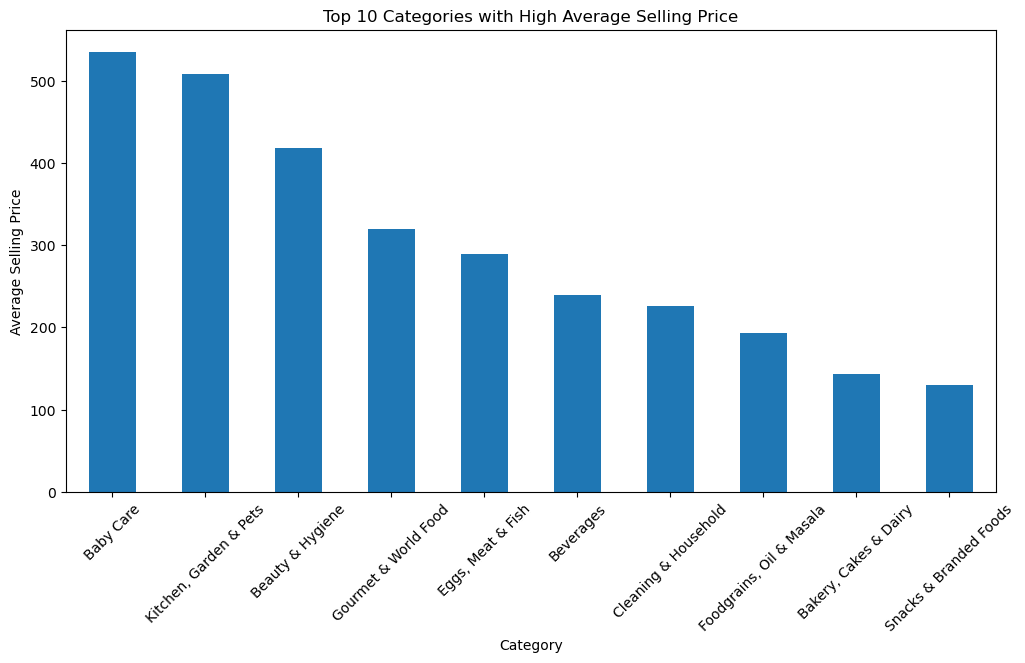

In [ ]:
plt.figure(figsize=(12, 6))
growth_opportunities.plot(kind='bar')
plt.title('Top 10 Categories with High Average Selling Price')
plt.xlabel('Category')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()


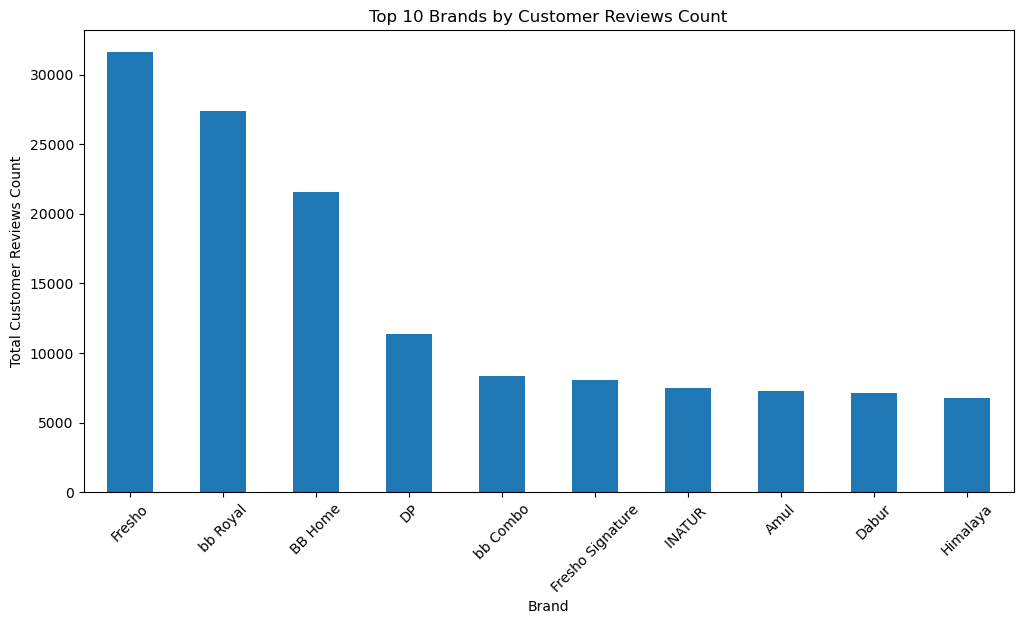

In [ ]:
plt.figure(figsize=(12, 6))
brand_loyalty.head(10).plot(kind='bar')
plt.title('Top 10 Brands by Customer Reviews Count')
plt.xlabel('Brand')
plt.ylabel('Total Customer Reviews Count')
plt.xticks(rotation=45)
plt.show()


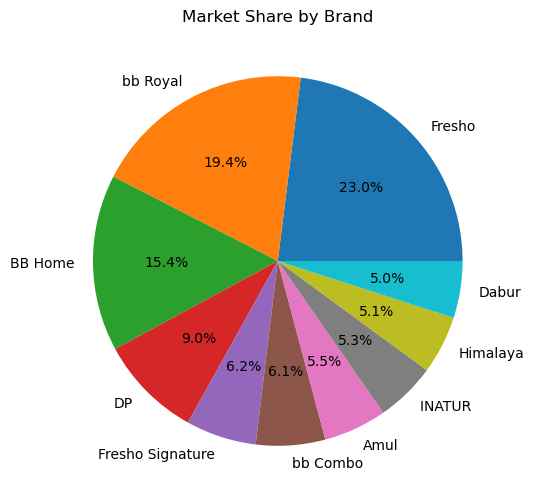

In [ ]:
plt.figure(figsize=(12, 6))
market_share.plot(kind='pie', autopct='%1.1f%%')
plt.title('Market Share by Brand')
plt.ylabel('')
plt.show()


/tmp/ipykernel_28407/2618373296.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['product_rating'], shade=True)


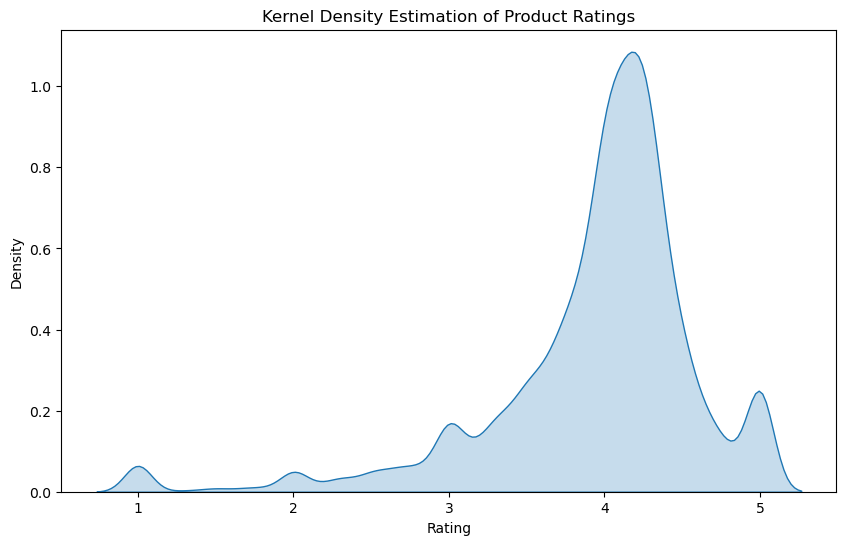

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['product_rating'], shade=True)
plt.title('Kernel Density Estimation of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()


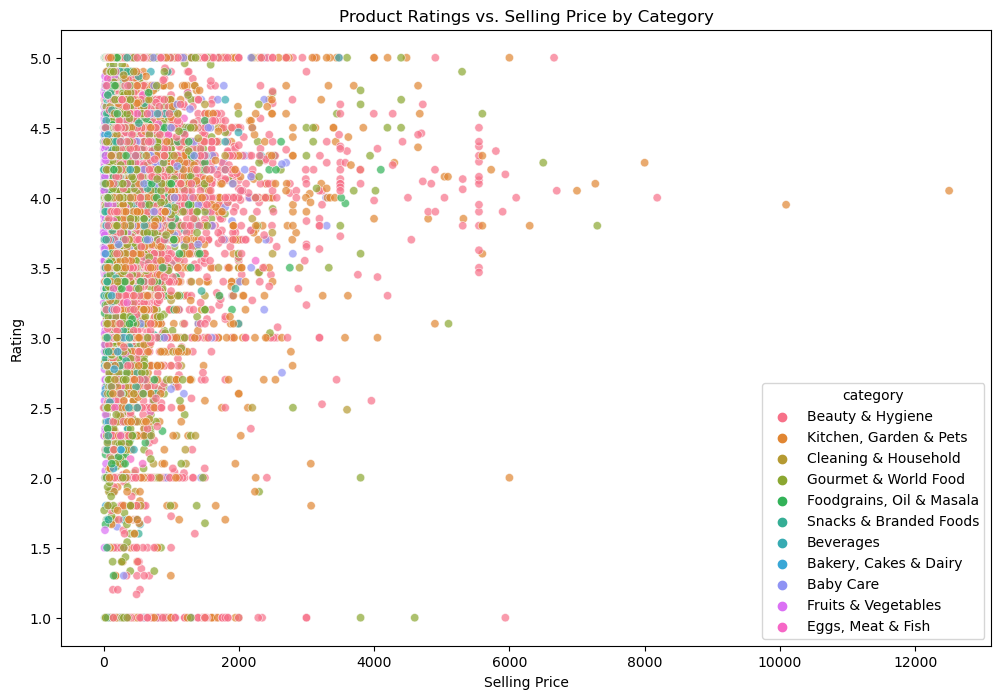

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='selling_price', y='product_rating', hue='category', alpha=0.7)
plt.title('Product Ratings vs. Selling Price by Category')
plt.xlabel('Selling Price')
plt.ylabel('Rating')
plt.show()


<Figure size 1400x700 with 0 Axes>

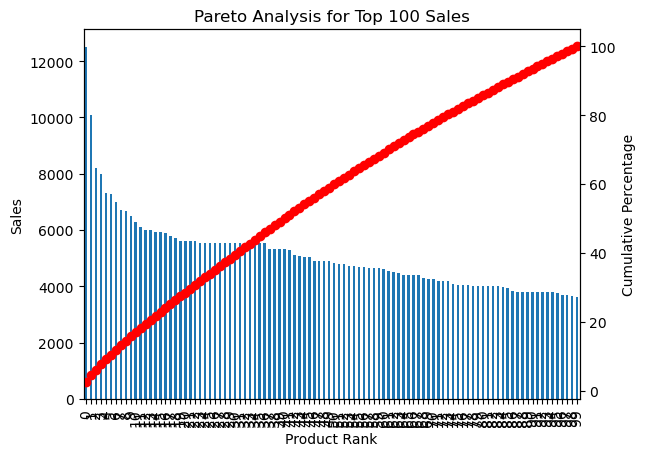

In [ ]:
# Calculate cumulative sales percentage for top 100 products
sales_data = df.groupby('product_id')['selling_price'].sum().sort_values(ascending=False).head(100)
total_sales = sales_data.sum()
sales_data = sales_data.reset_index()
sales_data['cumulative_percentage'] = sales_data['selling_price'].cumsum() / total_sales * 100

# Pareto chart for sales
plt.figure(figsize=(14, 7))
ax = sales_data.reset_index().plot(x='index', y='selling_price', kind='bar', legend=False)
ax2 = ax.twinx()
sales_data.reset_index().plot(x='index', y='cumulative_percentage', kind='line', ax=ax2, color='r', marker='o', linewidth=2, legend=False)
ax.set_ylabel('Sales')
ax2.set_ylabel('Cumulative Percentage')
ax.set_title('Pareto Analysis for Top 100 Sales')
ax.set_xlabel('Product Rank')
plt.show()


<Figure size 1400x700 with 0 Axes>

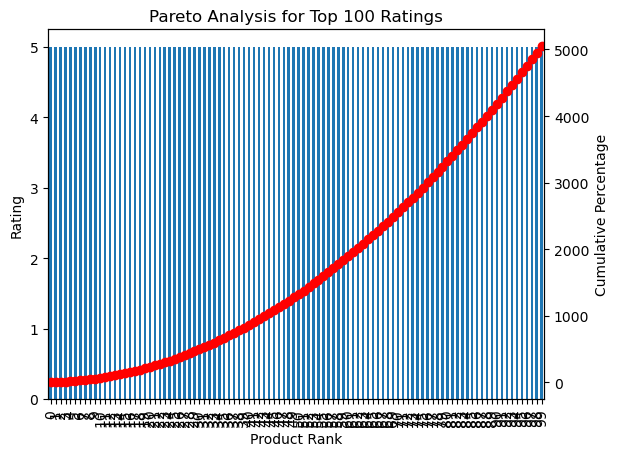

In [ ]:
# Calculate cumulative ratings percentage for top 100 products
rating_data = df.groupby('product_id')['product_rating'].mean().sort_values(ascending=False).head(100)
total_ratings = rating_data.count()
rating_data = rating_data.reset_index()
rating_data['cumulative_percentage'] = rating_data['product_rating'].rank(ascending=False, method='first').cumsum() / total_ratings * 100

# Pareto chart for ratings
plt.figure(figsize=(14, 7))
ax = rating_data.reset_index().plot(x='index', y='product_rating', kind='bar', legend=False)
ax2 = ax.twinx()
rating_data.reset_index().plot(x='index', y='cumulative_percentage', kind='line', ax=ax2, color='r', marker='o', linewidth=2, legend=False)
ax.set_ylabel('Rating')
ax2.set_ylabel('Cumulative Percentage')
ax.set_title('Pareto Analysis for Top 100 Ratings')
ax.set_xlabel('Product Rank')
plt.show()


<Figure size 1400x700 with 0 Axes>

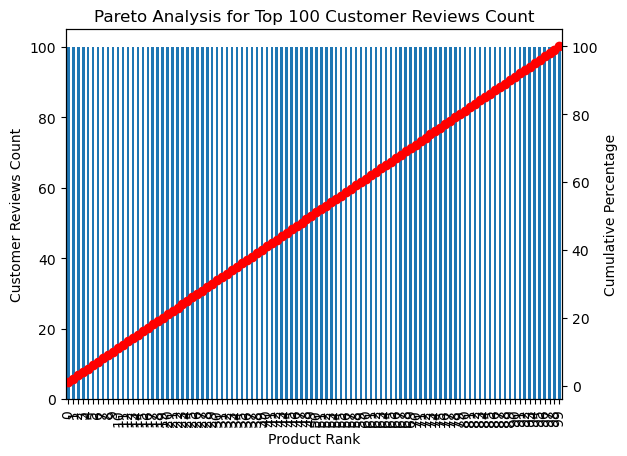

In [ ]:
# Calculate cumulative customer reviews count percentage for top 100 products
reviews_data = df.groupby('product_id')['customer_reviews_count'].sum().sort_values(ascending=False).head(100)
total_reviews = reviews_data.sum()
reviews_data = reviews_data.reset_index()
reviews_data['cumulative_percentage'] = reviews_data['customer_reviews_count'].cumsum() / total_reviews * 100

# Pareto chart for customer reviews count
plt.figure(figsize=(14, 7))
ax = reviews_data.reset_index().plot(x='index', y='customer_reviews_count', kind='bar', legend=False)
ax2 = ax.twinx()
reviews_data.reset_index().plot(x='index', y='cumulative_percentage', kind='line', ax=ax2, color='r', marker='o', linewidth=2, legend=False)
ax.set_ylabel('Customer Reviews Count')
ax2.set_ylabel('Cumulative Percentage')
ax.set_title('Pareto Analysis for Top 100 Customer Reviews Count')
ax.set_xlabel('Product Rank')
plt.show()


In [ ]:
X=df[['category','product_subcategory','brand','selling_price','original_price','product_type','seasonal_indicator','promotion_indicator','customer_demographics']]
y_rating=df[['product_rating']]
y_sales=df[['customer_reviews_count']]

In [ ]:
# Categorical columns to one-hot encode
categorical_cols = ['category', 'product_subcategory', 'brand', 'product_type', 'seasonal_indicator', 'promotion_indicator', 'customer_demographics']

# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Display the encoded dataframe
X_encoded

,selling_price,original_price,"category_Bakery, Cakes & Dairy",category_Beauty & Hygiene,category_Beverages,category_Cleaning & Household,"category_Eggs, Meat & Fish","category_Foodgrains, Oil & Masala",category_Fruits & Vegetables,category_Gourmet & World Food,...,product_type_Whole Spices,product_type_Wine & Rice Vinegar,product_type_Women's Deodorants,product_type_Yogurt & Shrikhand,seasonal_indicator_Spring,seasonal_indicator_Summer,seasonal_indicator_Winter,promotion_indicator_Yes,customer_demographics_Male,customer_demographics_Other
0,220.00,220.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,180.00,180.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,119.00,250.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,149.00,176.0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,162.00,162.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27548,199.20,249.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
27549,67.50,75.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27550,200.00,200.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
27551,396.00,495.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
ra=[]
for i in y_rating.values:
    if (i[0]<3.5):
        ra.append("Poor")
    elif(i[0]>3.5 and i[0]<4):
        ra.append("Decent")
    else:
        ra.append("Excellent")
y_rating=ra

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_rating, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.55
              precision    recall  f1-score   support

      Decent       0.24      0.23      0.24      1075
   Excellent       0.69      0.72      0.71      3571
        Poor       0.28      0.25      0.27       865

    accuracy                           0.55      5511
   macro avg       0.41      0.40      0.40      5511
weighted avg       0.54      0.55      0.55      5511



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Predict on test set
y_pred = grid_search.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Accuracy: 0.65
              precision    recall  f1-score   support

      Decent       0.37      0.03      0.05      1075
   Excellent       0.66      0.98      0.79      3571
        Poor       0.41      0.04      0.07       865

    accuracy                           0.65      5511
   macro avg       0.48      0.35      0.30      5511
weighted avg       0.56      0.65      0.53      5511



Accuracy: 0.20
              precision    recall  f1-score   support

        High       0.21      0.22      0.21      1094
         Low       0.20      0.18      0.19      1110
      Medium       0.21      0.23      0.22      1095
   Very High       0.21      0.19      0.20      1128
    Very Low       0.19      0.19      0.19      1084

    accuracy                           0.20      5511
   macro avg       0.20      0.20      0.20      5511
weighted avg       0.20      0.20      0.20      5511



In [ ]:
y_sales.value_counts()

customer_reviews_count
57                        313
30                        309
55                        303
85                        300
84                        300
                         ... 
65                        247
51                        244
63                        242
31                        241
32                        224
Length: 101, dtype: int64

In [ ]:
sa=[]
for i in y_sales.values:
    if(i[0]>0 and i[0]<=20):
        sa.append("Very Low")
    elif(i[0]>20 and i[0]<=40):
        sa.append("Low")
    elif(i[0]>40 and i[0]<=60):
        sa.append("Medium")
    elif(i[0]>60 and i[0]<=80):
        sa.append("High")
    else:
        sa.append("Very High")
y_sales=sa




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_sales, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.20
              precision    recall  f1-score   support

        High       0.21      0.22      0.21      1094
         Low       0.20      0.18      0.19      1110
      Medium       0.21      0.23      0.22      1095
   Very High       0.21      0.19      0.20      1128
    Very Low       0.19      0.19      0.19      1084

    accuracy                           0.20      5511
   macro avg       0.20      0.20      0.20      5511
weighted avg       0.20      0.20      0.20      5511



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Predict on test set
y_pred = grid_search.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.21
              precision    recall  f1-score   support

        High       0.24      0.04      0.07      1094
         Low       0.18      0.01      0.02      1110
      Medium       0.32      0.02      0.03      1095
   Very High       0.20      0.93      0.33      1128
    Very Low       0.23      0.01      0.02      1084

    accuracy                           0.21      5511
   macro avg       0.23      0.20      0.10      5511
weighted avg       0.23      0.21      0.10      5511

